# Introduction




**Introduction**

In the era of digital communication, social media platforms such as Twitter have become a rich source of real-time public opinion and sentiment. This dataset comprises a large collection of tweets, each annotated with a sentiment label alongside relevant metadata, including tweet ID, timestamp, query term, username, and the tweet text itself.
The aim of this project is to perform an in-depth analysis of the dataset to uncover trends, patterns, and relationships within the data. By leveraging Exploratory Data Analysis (EDA) techniques, we can identify potential data quality issues, gain valuable insights, and prepare the dataset for advanced analytical tasks. Ultimately, the project seeks to develop a machine learning model capable of automatically classifying tweet sentiment, which can be applied in various domains such as market research, brand monitoring, and social trend analysis.

**Objectives**

1. Conduct comprehensive exploratory data analysis to understand the dataset structure and contents.
2. Identify and handle missing values, duplicates, and inconsistencies in the data.
3. Visualize patterns and distributions to uncover insights about sentiment trends over time or across topics.
4. Prepare the dataset for machine learning by applying appropriate preprocessing and feature extraction techniques.
5. Build and evaluate a sentiment classification model with the goal of achieving high accuracy and reliability.

**Scope**

This project focuses on sentiment analysis of Twitter data, specifically distinguishing between different sentiment categories based on labeled examples. The scope includes data cleaning, preprocessing, visualization, and model building, but does not extend to real-time data streaming or multilingual sentiment detection. The final outcome will be a trained sentiment analysis model that can be applied to similar datasets for sentiment prediction.

---





**Methodology**
    
The methodology for this project is designed to ensure a structured and systematic approach to sentiment analysis using Twitter data. The process involves the following stages:

1. **Data Collection**
   The dataset, provided in CSV format, contains pre-labeled tweets along with associated metadata. It serves as the primary data source for analysis.

2. **Data Understanding**

Initial inspection of the dataset structure is carried out using Python’s Pandas library to examine column names, data types, and sample records. This step provides a foundational understanding of the data.

4. **Data Cleaning and Preprocessing**

   * Renaming columns for clarity.
   * Handling missing or inconsistent data.
   * Removing unnecessary elements such as user mentions, URLs, numbers, and special characters.
   * Converting text to lowercase and removing stopwords to normalize the content.

5. **Exploratory Data Analysis (EDA)**

   * Statistical summaries to understand the distribution of sentiment classes.
   * Visualization of sentiment trends over time.
   * Analysis of frequently occurring words and phrases for each sentiment category.

6. **Feature Extraction**

Applying text vectorization techniques such as TF-IDF to transform tweets into numerical representations suitable for machine learning models.

7. **Model Development**

Training machine learning algorithms such as Logistic Regression, Naïve Bayes, or Support Vector Machines to classify sentiments. Hyperparameter tuning is performed to optimize model performance.

8. **Model Evaluation**

Using metrics such as accuracy, precision, recall, and F1-score to assess the effectiveness of the sentiment classification model.

9. **Deployment and Future Work**

Although deployment is outside the current project scope, the trained model can be integrated into applications for real-time sentiment monitoring. Future work may include handling multilingual tweets or expanding the dataset for broader coverage.




In [91]:
import pandas as pd

file_path = "XInformation.csv"
df = pd.read_csv(file_path, encoding='latin-1', header=None)

In [92]:
df.columns.tolist()

[0, 1, 2, 3, 4, 5]

In [93]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# "1. Renaming Columns"


In [94]:
df.columns = [
    "target",        
    "id",           
    "date",          
    "query",         
    "user",          
    "text"          
]

In [95]:
df.head()

,target,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# "2. Checking Data Types"

In [96]:
df["date"] = pd.to_datetime(
    df["date"].astype(str).str.replace("PDT", ""),
    errors="coerce"
)

In [97]:
df.head()

,target,id,date,query,user,text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# "3. Checking Missing Values"


In [98]:
df.isnull().sum()


target    0
id        0
date      0
query     0
user      0
text      0
dtype: int64

# "4. Text Cleaning"

In [99]:
import re
df["clean_text"] = df["text"].apply(lambda x: re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", "", str(x).lower()))

In [100]:
df.head()

,target,id,date,query,user,text,clean_text
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww thats a bummer you shoulda got david ...
1,0,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his facebook by t...
2,0,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,i dived many times for the ball managed to sa...
3,0,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",no its not behaving at all im mad why am i he...


# "5. Exploratory Data Analysis (EDA)"

**"1. Data Overview"**

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   target      1600000 non-null  int64         
 1   id          1600000 non-null  int64         
 2   date        1600000 non-null  datetime64[ns]
 3   query       1600000 non-null  object        
 4   user        1600000 non-null  object        
 5   text        1600000 non-null  object        
 6   clean_text  1600000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 85.4+ MB


In [102]:
df.describe(include="all")

,target,id,date,query,user,text,clean_text
count,1.600000e+06,1.600000e+06,1600000,1600000,1600000,1600000,1600000
unique,NaN,NaN,NaN,1,659775,1581466,1530937
top,NaN,NaN,NaN,NO_QUERY,lost_dog,isPlayer Has Died! Sorry,
freq,NaN,NaN,NaN,1600000,549,210,2520
mean,2.000000e+00,1.998818e+09,2009-05-31 07:26:25.057991424,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467810e+09,2009-04-06 22:19:45,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,2009-05-28 23:01:17,NaN,NaN,NaN,NaN
50%,2.000000e+00,2.002102e+09,2009-06-02 03:08:55,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,2009-06-15 05:21:43.249999872,NaN,NaN,NaN,NaN
max,4.000000e+00,2.329206e+09,2009-06-25 10:28:31,NaN,NaN,NaN,NaN


**"2. Target Value Distribution"**

In [103]:
df["target"].value_counts()
df["target"].value_counts(normalize=True) * 100  

target
0    50.0
4    50.0
Name: proportion, dtype: float64

**"3. Most Active Users Analysis"**

In [104]:
df["user"].value_counts().head(10)

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64

**"4. Activity Over Time Analysis"**

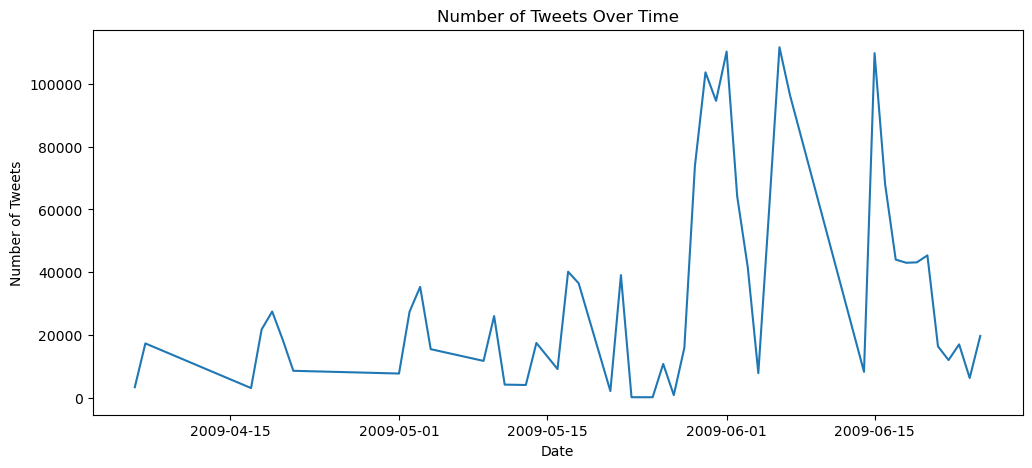

In [105]:
import matplotlib.pyplot as plt

df["date"].dt.date.value_counts().sort_index().plot(kind="line", figsize=(12,5))
plt.title("Number of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


**"5. Most Frequent Words in Texts"**

In [106]:
from collections import Counter
import re

all_words = " ".join(df["text"].astype(str))
all_words = re.sub(r"http\S+|@\S+|[^a-zA-Z\s]", "", all_words.lower()).split()
word_freq = Counter(all_words)

print(word_freq.most_common(20))

[('i', 751161), ('to', 564588), ('the', 520085), ('a', 377991), ('my', 314108), ('and', 298446), ('you', 270131), ('is', 236028), ('it', 230919), ('for', 215722), ('in', 214386), ('of', 183448), ('im', 178362), ('on', 167122), ('me', 160204), ('so', 150814), ('have', 144545), ('that', 141351), ('but', 127513), ('just', 125065)]


**"6. Text Length Analysis"**

<Axes: >

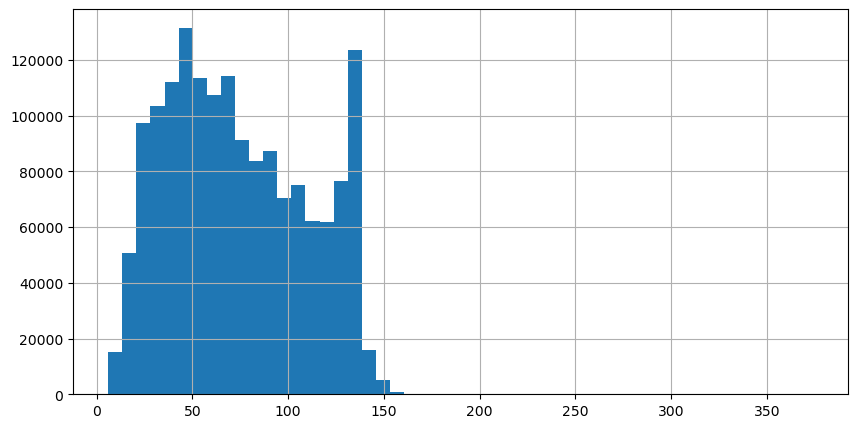

In [107]:
df["text_length"] = df["text"].astype(str).apply(len)
df["text_length"].hist(bins=50, figsize=(10,5))

**"7. Correlation Between Variables"**

**1-Is There a Relationship Between Text Length and the Target?**

In [108]:
df.groupby("target")["text_length"].mean()

target
0    74.301790
4    73.878433
Name: text_length, dtype: float64

# 📊 Visual EDA on Tweets Data 

**"1. Target Value Distribution"**

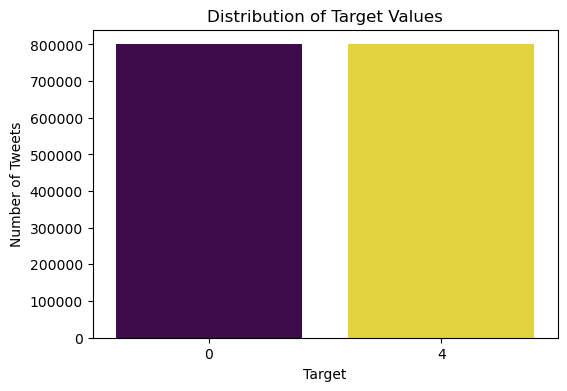

In [109]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, hue="target", palette="viridis", legend=False)
plt.title("Distribution of Target Values")
plt.xlabel("Target")
plt.ylabel("Number of Tweets")
plt.show()


**"2. Top 10 Most Active Users"**

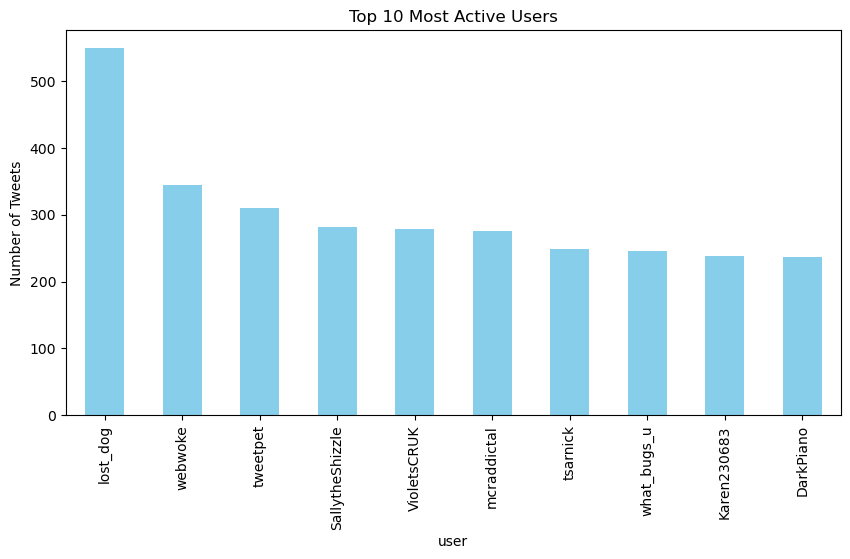

In [110]:
plt.figure(figsize=(10,5))
df["user"].value_counts().head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Active Users")
plt.ylabel("Number of Tweets")
plt.show()

**"3. Activity Over Time"**

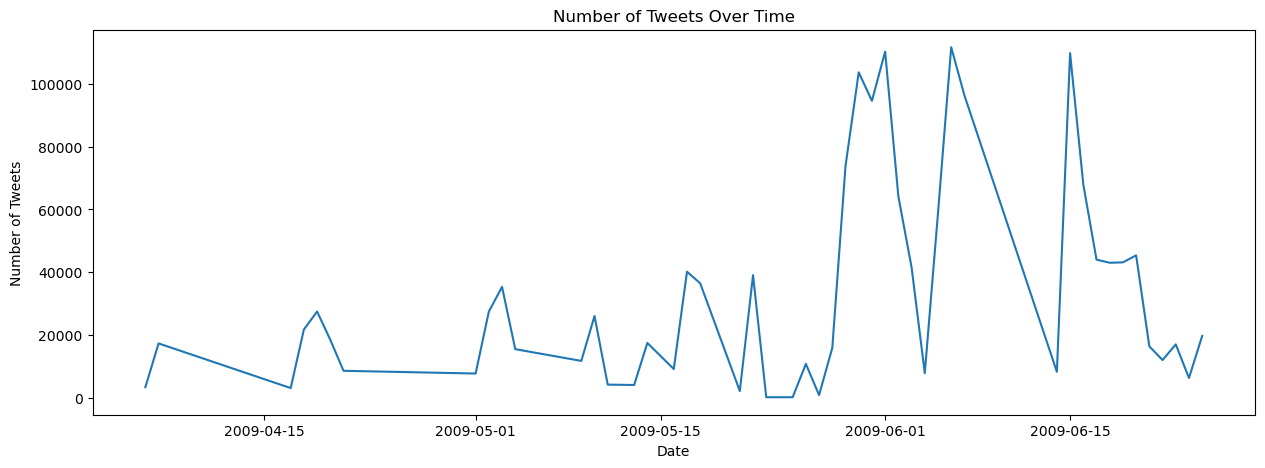

In [111]:
df["date_only"] = df["date"].dt.date
df["date_only"].value_counts().sort_index().plot(figsize=(15,5))
plt.title("Number of Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()


**"5. Most Common Words"**

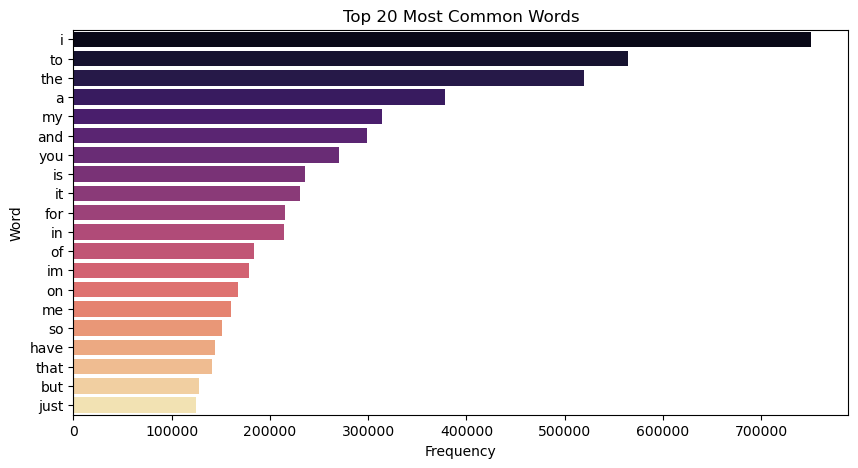

In [112]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), hue=list(words), palette="magma", legend=False)
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


# Data Preprocessing

**"1. Full Text Cleaning"**

In [113]:
import re
import nltk
from nltk.corpus import stopwords

# Download quietly
nltk.download("stopwords", quiet=True)

stop_words = set(stopwords.words("english"))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)  # Remove links
    text = re.sub(r"@\w+", "", text)            # Remove mentions
    text = re.sub(r"[^a-z\s]", "", text)        # Remove symbols/numbers
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

df["clean_text"] = df["text"].astype(str).apply(clean_text)


**2. Prepare the Labels**

In [114]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["target"] = encoder.fit_transform(df["target"])

**3. Text-to-Numbers Conversion (Vectorization)**

In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df["clean_text"])
y = df["target"]

**4. Train/Test Split**

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**5. Model Training**

In [117]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

**6. Evaluation**

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76    159494
           1       0.76      0.75      0.76    160506

    accuracy                           0.76    320000
   macro avg       0.76      0.76      0.76    320000
weighted avg       0.76      0.76      0.76    320000

[[122196  37298]
 [ 40109 120397]]


**7. Model Improvement**

In [119]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression(max_iter=1000)

# Grid Search
grid = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

# Update the model with the best parameters
best_model = grid.best_estimator_


Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Accuracy: 0.7742023437500001


**8. Testing the Model on New Data**

In [120]:
# Example of new sentences
new_tweets = ["I love this product!", "This is the worst experience ever"]

# Transform new tweets using the fitted vectorizer
new_tweets_tfidf = vectorizer.transform(new_tweets)

# Predict sentiment
predictions = best_model.predict(new_tweets_tfidf)

# Display results
for tweet, pred in zip(new_tweets, predictions):
    print(f"Tweet: {tweet} --> Prediction: {pred}")


Tweet: I love this product! --> Prediction: 1
Tweet: This is the worst experience ever --> Prediction: 0


**9. Model Saving**

In [121]:
import joblib

# Save Model
joblib.dump(best_model, "sentiment_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")


['vectorizer.pkl']